In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random
from scipy.stats import poisson
import scipy as sc

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
#df_lenovo = pd.read_csv(r'C:\Users\gst8882\Desktop\DSC541\lenovo.csv')

df_lenovo2 = pd.read_csv(r'lenovo.csv')
df_lenovo2.head()

,Plant,item/Component,Date,FG,Quantity
0,1001,000000000000011977,20171123,209MH32,1
1,1001,000000000000008820,20171123,209MH32,1
2,1001,SSW0F82867,20171123,209MH32,1
3,1001,SSW0G44678,20171123,209MH32,1
4,1001,SSW0F63159,20171123,209MH32,2


In [4]:
df_lenovo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
Plant             155 non-null int64
item/Component    155 non-null object
Date              155 non-null int64
FG                155 non-null object
Quantity          155 non-null int64
dtypes: int64(3), object(2)
memory usage: 6.1+ KB


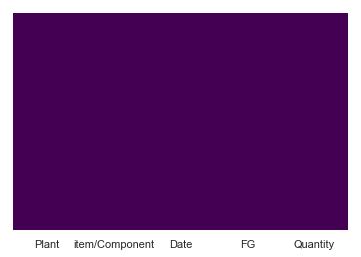

In [5]:
sns.heatmap(df_lenovo2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.countplot(x='Plant', data=df_lenovo)
# one plant 

NameError: name 'df_lenovo' is not defined

In [7]:
sns.countplot(x='FG_new', data=df_lenovo2)
# 2 Finished goods

ValueError: Could not interpret input 'FG_new'

In [ ]:
plt.subplots(figsize=(10,35));
sns.countplot( y='item_Number',  data=df_lenovo2);


In [ ]:
#Check them out
df_lenovo2['item_Number'].value_counts()

# Done with data exploration ! Gotta make some simulation data to model.

# Simulate orders

# Create order Numbers... 1-100

In [4]:
order_number = np.arange(1,101)
print(order_number)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


# Make a list of 100 random Finished Goods

In [5]:
FG = [random.randrange(1, 6, 1) for _ in range(100)]
print(FG)

[4, 2, 1, 1, 1, 1, 4, 4, 1, 1, 5, 3, 4, 5, 2, 4, 1, 1, 1, 5, 4, 5, 5, 3, 3, 5, 3, 3, 2, 4, 1, 2, 1, 1, 5, 4, 2, 5, 3, 2, 1, 4, 4, 3, 5, 3, 5, 4, 1, 3, 4, 3, 3, 4, 2, 4, 5, 5, 3, 5, 3, 4, 2, 3, 5, 1, 5, 5, 2, 1, 1, 4, 5, 3, 5, 4, 1, 2, 5, 4, 1, 1, 2, 5, 1, 1, 2, 4, 5, 2, 1, 2, 5, 5, 1, 2, 1, 4, 1, 5]


# The order size should be a  Poisson Distribution centered around 20
### This is gonna be a little hard to make so we will make 2 lists one of small orders and one of big orders and combine the 2.  

## This gives you a set of ramdom numbers with lambda as 2 (10000 samples)

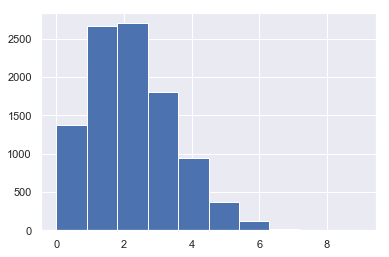

10000

In [6]:
import numpy as np
import scipy as sc
from scipy.stats import skewnorm
s = np.random.poisson(2, 10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 10)
plt.show()
len(s)


## This gives you a set of random numbers with lambda as 50 (100 samples)


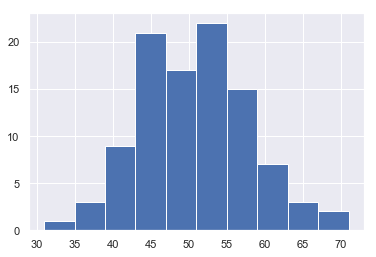

100

In [7]:

s_larger = np.random.poisson(50, 100)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s_larger, 10)
plt.show()
len(s_larger)

## You can combine the s and s_larger, use s as small orders and s_larger as orders from the big corporations. Then, if you do not need that many, you can do a sample of the combined s and s_larger.

In [12]:
bigS = [*s,*s_larger]
print("bigS = ",len(bigS))
bigS[:]=(value for value in bigS if value != 0)
print(len(bigS))

Order_Size = []
for _ in range(100):
    rando_orders = (random.choice(bigS))
    Order_Size.append(rando_orders)
print("Order_Size = ",len(Order_Size))
print(Order_Size)

bigS =  10100
8732
Order_Size =  100
[1, 1, 1, 2, 2, 43, 4, 3, 3, 5, 2, 3, 3, 5, 3, 2, 1, 2, 1, 1, 2, 4, 1, 2, 1, 43, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 3, 4, 3, 2, 2, 3, 3, 3, 3, 5, 2, 3, 1, 5, 1, 1, 4, 3, 4, 1, 3, 4, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 2, 3, 1, 2, 3, 2, 2, 3, 3, 2, 2, 4, 3, 2, 4, 2, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3]


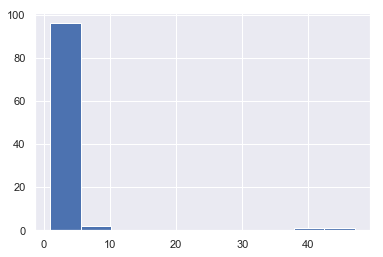

In [13]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(Order_Size, 10)
plt.show()


# Turn the 3 lists above into a Data Frame
## lists = Order Number, Finished Good, and Order Size

In [18]:
df_orders = pd.DataFrame({'Order Number':order_number, 'Finished Good':FG, 'Order Size':Order_Size})
df_orders

,Order Number,Finished Good,Order Size
0,1,4,1
1,2,2,1
2,3,1,1
3,4,1,2
4,5,1,2
5,6,1,43
6,7,4,4
7,8,4,3
8,9,1,3
9,10,1,5


# Get the parts Data Set

In [19]:
df_parts = pd.read_csv(r'sharedgoods.csv')
df_parts.head()

,Rand_Computers,Item_Number,Quantity,Shared_parts
0,1.0,000000000000008820,1,.
1,NaN,SSW0G43707,2,2
2,NaN,SSW0G44348,2,3
3,NaN,SSW0G44670,1,.
4,NaN,SSW0K51133,2,2


In [20]:
df_parts[df_parts['Item_Number']=='000000000000008820']

,Rand_Computers,Item_Number,Quantity,Shared_parts
0,1.0,000000000000008820,1,.


# Clean up the parts DF

In [21]:
#Rename the Rand_computer col to match the one in df_orders
df_parts = df_parts.rename(columns={"Rand_Computers": "Finished Good"})
#Make NAN = 0 
df_parts = df_parts.fillna(value=0)
#Strip the float off of the finished good col
df_parts["Finished Good"]= df_parts["Finished Good"].astype(int)
df_parts.info()
print(df_parts.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
Finished Good    155 non-null int32
Item_Number      155 non-null object
Quantity         155 non-null int64
Shared_parts     155 non-null object
dtypes: int32(1), int64(1), object(2)
memory usage: 4.3+ KB
   Finished Good         Item_Number  Quantity Shared_parts
0              1  000000000000008820         1            .
1              0          SSW0G43707         2            2
2              0          SSW0G44348         2            3
3              0          SSW0G44670         1            .
4              0          SSW0K51133         2            2


In [16]:
new_val = 0

for i in range(len(df_parts['Finished Good'])):
    if df_parts['Finished Good'].iloc[i] != 0:
        new_val = df_parts['Finished Good'].iloc[i]
    
    df_parts.at[i,'Finished Good'] = new_val

df_parts = df_parts.drop(['Shared_parts'], axis=1)
df_parts.to_csv('finished_good_parts.csv')
df_parts
    

,Finished Good,Item_Number,Quantity
0,1,000000000000008820,1
1,1,SSW0G43707,2
2,1,SSW0G44348,2
3,1,SSW0G44670,1
4,1,SSW0K51133,2
5,1,SSW0K51575,1
6,1,SSW0G44392,2
7,1,000000000031028776,1
8,1,000000000031040179,2
9,1,000000000031503985,1


# Combine the finished good and parts Data Sets

In [22]:
df_full = df_orders.merge(df_parts, on="Finished Good", how="outer")
display(df_full)

,Order Number,Finished Good,Order Size,Item_Number,Quantity,Shared_parts
0,1.0,4,1.0,SSW0F82867,1,.
1,7.0,4,4.0,SSW0F82867,1,.
2,8.0,4,3.0,SSW0F82867,1,.
3,13.0,4,3.0,SSW0F82867,1,.
4,16.0,4,2.0,SSW0F82867,1,.
5,21.0,4,2.0,SSW0F82867,1,.
6,30.0,4,2.0,SSW0F82867,1,.
7,36.0,4,2.0,SSW0F82867,1,.
8,42.0,4,3.0,SSW0F82867,1,.
9,43.0,4,2.0,SSW0F82867,1,.


In [ ]:
#df_full.to_csv('full_orders.csv')

In [ ]:
df3 = pd.DataFrame()
df2 = pd.DataFrame()

In [23]:
import math

df2 = df_full['Item_Number'].value_counts()
df3a = pd.DataFrame(data=df2.index, columns=['Item_Number'])
df3b = pd.DataFrame(data=df2.values, columns=['count'])
df3 = pd.merge(df3a,df3b, left_index=True, right_index=True)
df3['95'] = df3['count'].apply(lambda x: math.ceil (x*0.95))
#df3['95']=df3['95'].round()
df3

,Item_Number,count,95
0,000000000000008820,26,25
1,SSW0K51574,24,23
2,SSW0F82867,20,19
3,SSW0G42871,15,15
4,000000000000011977,15,15
5,SL10F25678,2,2
6,PROC13209,2,2
7,PROC1811,2,2
8,PROC12008,2,2
9,PROC3420,2,2


In [ ]:
#df3.to_csv('parts_level.csv')

# This is all extra ... dont worry about it

In [28]:
#O1 = 10
#O2 = 20
#O3 = 30
# DONT DO THIS !!!
lst = [[random.randrange(1,6,1) for _ in range(random.randrange(1,51,1))] for __ in range(1,21)]
print(len(lst))
#print(lst)
print(lst[0])
print(lst[1])
print(lst[2])
print(lst[3])
print(lst[4])
print(lst[5])
print(lst[6])

20
[4, 5, 5, 2, 4, 1, 3, 1, 2, 5, 2, 1, 3, 4, 4, 3, 5, 1, 4, 4, 4, 3, 1, 4, 5, 2, 5, 2, 2, 2, 3]
[2, 2, 5, 1, 4, 5, 3, 5, 3, 3, 1, 4, 3, 1]
[2, 4, 3, 2, 5, 3, 2, 1, 5, 3, 4, 5, 1, 5, 3, 1, 3, 5, 3, 1, 3, 5, 1, 3, 4, 5, 4, 2, 2, 4, 5, 4, 5, 1, 4, 3, 4, 2, 5, 1, 4, 3, 1, 3, 2, 2, 3, 2]
[2, 2, 4, 2, 4, 5, 1, 2, 3, 4, 3, 5, 2, 1, 4]
[3, 3, 5, 3, 3, 1, 2, 3, 4, 4, 5, 5, 5, 4, 1, 4, 5, 5, 2, 5, 4, 3, 5, 5, 1, 1, 3, 4]
[5, 3, 5, 3, 1, 1, 1, 2, 4, 5, 4, 4, 4, 5, 3, 3, 1, 4, 5, 4, 4, 3, 1, 2, 5, 1, 4, 1, 1, 5, 2, 1, 1, 2, 1, 1, 4]
[5, 3, 2, 4, 4, 2, 1, 3, 5, 2, 2, 5, 4, 3, 3, 3, 4, 4, 4, 1, 4, 1, 4, 5, 4, 2, 1, 5, 3, 1, 5, 5]


In [27]:
# not working yet 
#order_size = np.random.poisson(5,100)
order_size = poisson.rvs(mu=15, size=100, random_state=42)
print(order_size)

[18 10 16 19 11 13 14 16 12 14 11 16 16 13 17 10 12 13 15  9  6 14 19 12
 10 18 17 18 13 20 13 13 18 21 10 18 18 15 13 21 14 12 12 22 19 21 13 12
 14 10 23 15 25 15 12 16  7 21 10 17 12 13 17  9 13 17 15 17 17 22 13 12
 19 15 21 13 17 16  9 15 17 18 13 17  9 12 21 19 16 11 12 17 21 12 20 11
 22 16 10 20]


In [54]:
#fake = poisson.pmf(k=20, mu=.6)
#fake = poisson.std(mu=20, loc=0)
#fake = poisson.pmf(k=20, mu=.6)
#fake = poisson.rvs(mu=15, size=100, loc=20, random_state=1001)
#fake

x=np.arange(1,50)

for _ in range (100):
    fake =  poisson.std(mu=x, loc=0)
#    print(fake)

c:\Anaconda3)\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


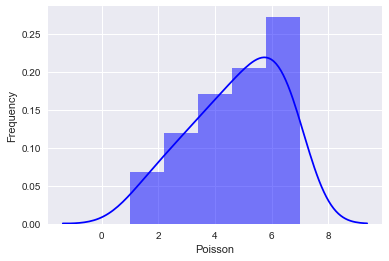

In [3]:

#fake = poisson.rvs(mu=2, size=100, random_state=1001)

ax = sns.distplot(fake,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth":25,'alpha':.5}
                 );
ax.set(xlabel='Poisson', ylabel='Frequency');

# Skew a Normal Dist... looks ok 

[0.00788612 0.03382494 0.05976376 0.08570258 0.1116414  0.13758022
 0.16351904 0.18945786 0.21539668 0.2413355  0.26727432 0.29321314
 0.31915196 0.34509078 0.3710296  0.39696842 0.42290724 0.44884606
 0.47478488 0.5007237  0.52666252 0.55260134 0.57854016 0.60447898
 0.6304178  0.65635662 0.68229544 0.70823426 0.73417308 0.7601119
 0.78605072 0.81198954 0.83792836 0.86386718 0.889806   0.91574482
 0.94168364 0.96762246 0.99356128 1.0195001  1.04543892 1.07137774
 1.09731656 1.12325538 1.1491942  1.17513302 1.20107184 1.22701066
 1.25294948 1.2788883  1.30482712 1.33076594 1.35670476 1.38264358
 1.4085824  1.43452122 1.46046004 1.48639886 1.51233768 1.5382765
 1.56421532 1.59015414 1.61609296 1.64203178 1.6679706  1.69390942
 1.71984824 1.74578706 1.77172588 1.7976647  1.82360352 1.84954234
 1.87548116 1.90141998 1.9273588  1.95329762 1.97923644 2.00517526
 2.03111408 2.0570529  2.08299172 2.10893054 2.13486936 2.16080818
 2.186747   2.21268582 2.23862464 2.26456346 2.29050228 2.316441

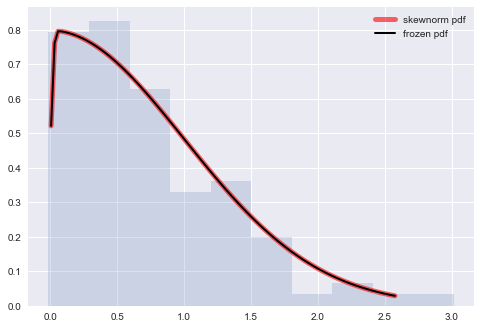

[ 1.45434148  0.6795275   0.9425207   1.20643752  1.34272074  0.54238723
 -0.0125963   1.68369141  0.85831431  0.35545462  0.73956624  0.75051356
  0.20373297  0.38742815  1.39592516  3.018094    0.09634538  1.27355615
  0.53572     0.70369634  0.98366627  0.7486989   0.43134992  0.42598075
  1.18874931  0.86063657  0.12183345  0.48729902  0.25430201  0.46913411
  0.30951705  0.96169176  1.52855343  0.914766    0.44299412  1.30407395
  1.24924919  1.91000761  1.08098017  0.33851579  0.07712111  0.54732103
  1.54050397  0.42510394  0.57591824  0.9712887   0.05712682  2.51774942
  1.31412215  1.0168262   0.46043044  0.18093164  1.51084929  0.67076425
  1.11645709  0.00444201  0.40495164  0.75043696  1.35349507  0.09985574
  1.44122905  0.17704279  0.26121587  1.68645288  0.31894796  0.28563189
  0.95015399  0.0304154   0.40614367  2.20827562  0.06077409  0.58013646
  0.16591944  0.18193464  0.63793955  0.28403129  0.06202555  1.61443737
  0.47269521  0.69290325  0.79010985  0.09553757  0

In [65]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#Calculate a few first moments:

a = 50
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

#Display the probability density function (pdf):

x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

print(x)

#Alternatively, the distribution object can be called (as a function) to fix the shape, location and scale parameters. 
#This returns a “frozen” RV object holding the given parameters fixed.
# prob dont need this ! 
#but here it is


#Freeze the distribution and display the frozen pdf:
rv = skewnorm(a)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:
vals = skewnorm.ppf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], skewnorm.cdf(vals, a))
True

#Generate random numbers:
r = skewnorm.rvs(a, size=100)

#And compare the histogram:
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

print(r)


# Use the Poisson Dist PDF equation .  Maybe loop it. 

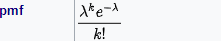

## So I guess PMF (Probability Mass Function) so its only one value.  I need to use the PDF (Probability Density Function) version.  

In [49]:
lam = 5
k = 50 #np.arange(1,50)
p = ((lam^k)*np.exp(-lam)) / sc.special.factorial(k)
print(p)

1.2184715897721508e-65


# Make fake order size... because I give up

In [43]:
Order_Size = [1,1,2,2,3,3,3,4,4,5,5,5,6,6,6,7,7,8,8,9,9,9,9,10,10,10,11,
             11,11,12,12,13,13,13,14,14,14,14,14,15,15,15,15,15,16,
             16,16,16,16,16,17,17,17,18,18,18,18,18,19,19,19,19,19,20,20,20,
             20,20,20,20,21,22,23,24,25,26,27,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
len(Order_Size)

100

c:\Anaconda3)\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


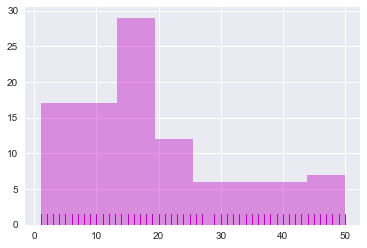

In [41]:
#plt.xticks([0,5,10,15,20,25,30,50])
sns.distplot(Order_Size, color="m", kde=False, rug=True);

